# Part 1: Selecting and Analyzing the Dataset
## Ames Housing Dataset

### 1.1 Import Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


### 1.2 Load Dataset

In [87]:
# Load the Ames Housing dataset
data = pd.read_csv('AmesHousing.csv')

print("Dataset loaded successfully!")
print(f"\nDataset shape: {data.shape}")
print(f"Number of samples: {data.shape[0]}")
print(f"Number of features: {data.shape[1]}")

# Display first rows
print("\nFirst 5 rows:")
data.head()

Dataset loaded successfully!

Dataset shape: (2930, 82)
Number of samples: 2930
Number of features: 82

First 5 rows:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### 1.3 Dataset Information

In [88]:
# Dataset info
print("Dataset Information:")
print(data.info())

# Statistical summary
print("\nStatistical Summary:")
data.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### 1.4 Missing Values Analysis

Total features with missing values: 27

Top 20 features with most missing values:
       Feature  Missing_Count  Percentage
       Pool QC           2917   99.556314
  Misc Feature           2824   96.382253
         Alley           2732   93.242321
         Fence           2358   80.477816
  Mas Vnr Type           1775   60.580205
  Fireplace Qu           1422   48.532423
  Lot Frontage            490   16.723549
   Garage Qual            159    5.426621
   Garage Cond            159    5.426621
 Garage Yr Blt            159    5.426621
 Garage Finish            159    5.426621
   Garage Type            157    5.358362
 Bsmt Exposure             83    2.832765
BsmtFin Type 2             81    2.764505
     Bsmt Cond             80    2.730375
     Bsmt Qual             80    2.730375
BsmtFin Type 1             80    2.730375
  Mas Vnr Area             23    0.784983
Bsmt Full Bath              2    0.068259
Bsmt Half Bath              2    0.068259


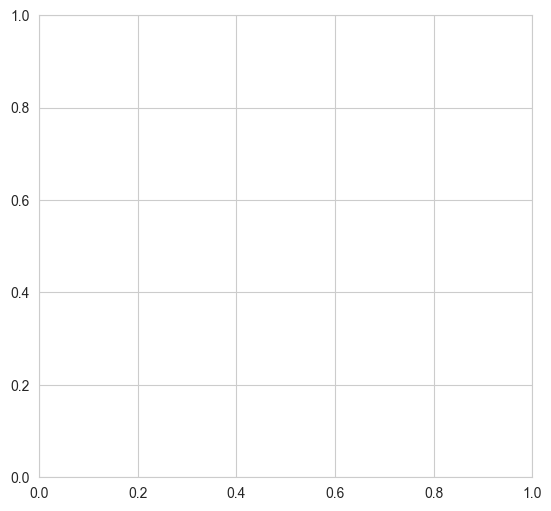

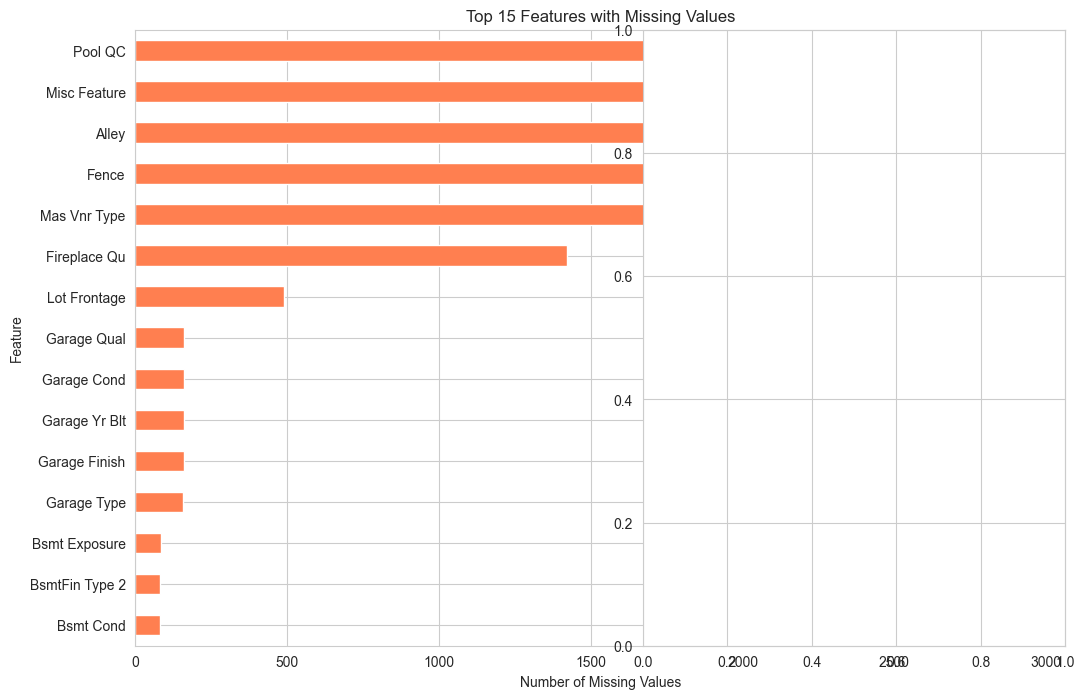

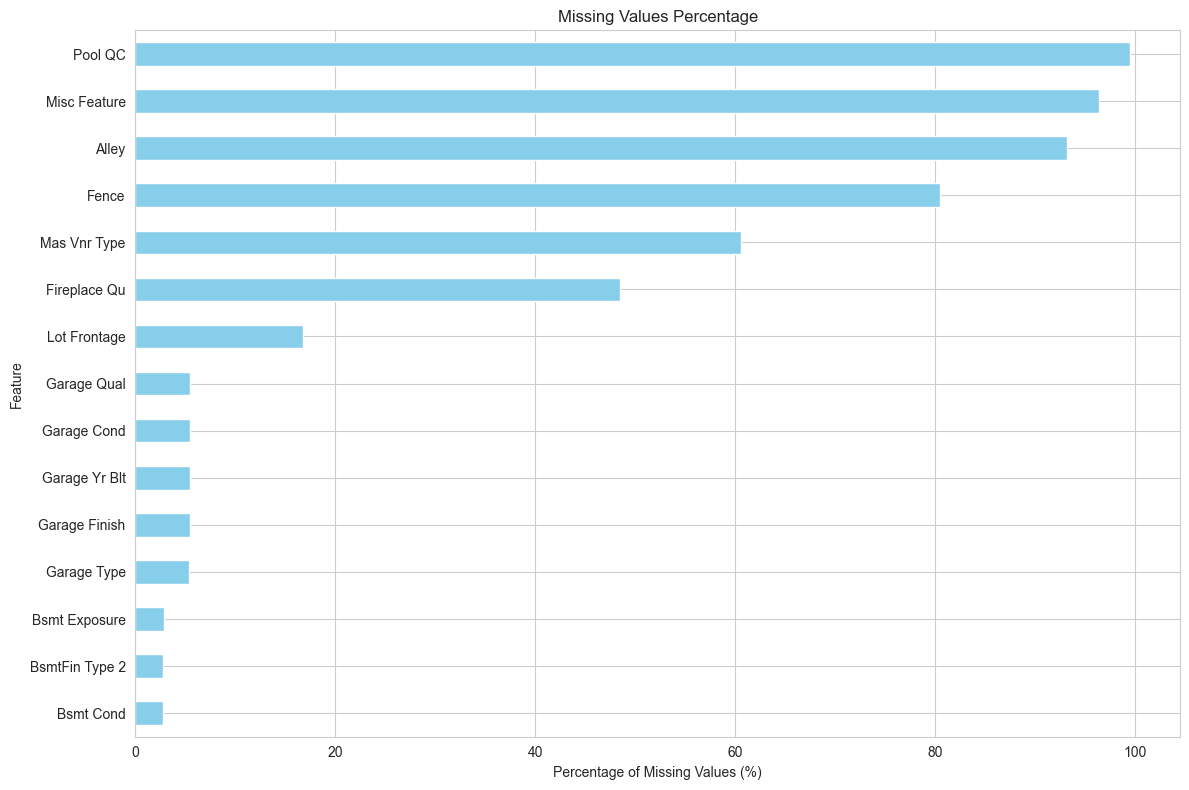

In [89]:
# Check missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

missing_df = pd.DataFrame({
    'Feature': missing_values.index,
    'Missing_Count': missing_values.values,
    'Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print(f"Total features with missing values: {len(missing_df)}")
print("\nTop 20 features with most missing values:")
print(missing_df.head(20).to_string(index=False))

# Visualize missing values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
missing_df.head(15).plot(x='Feature', y='Missing_Count', kind='barh', color='coral', legend=False)
plt.xlabel('Number of Missing Values')
plt.title('Top 15 Features with Missing Values')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
missing_df.head(15).plot(x='Feature', y='Percentage', kind='barh', color='skyblue', legend=False)
plt.xlabel('Percentage of Missing Values (%)')
plt.title('Missing Values Percentage')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

### 1.5 Target Variable Analysis (SalePrice)

SalePrice Statistics:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


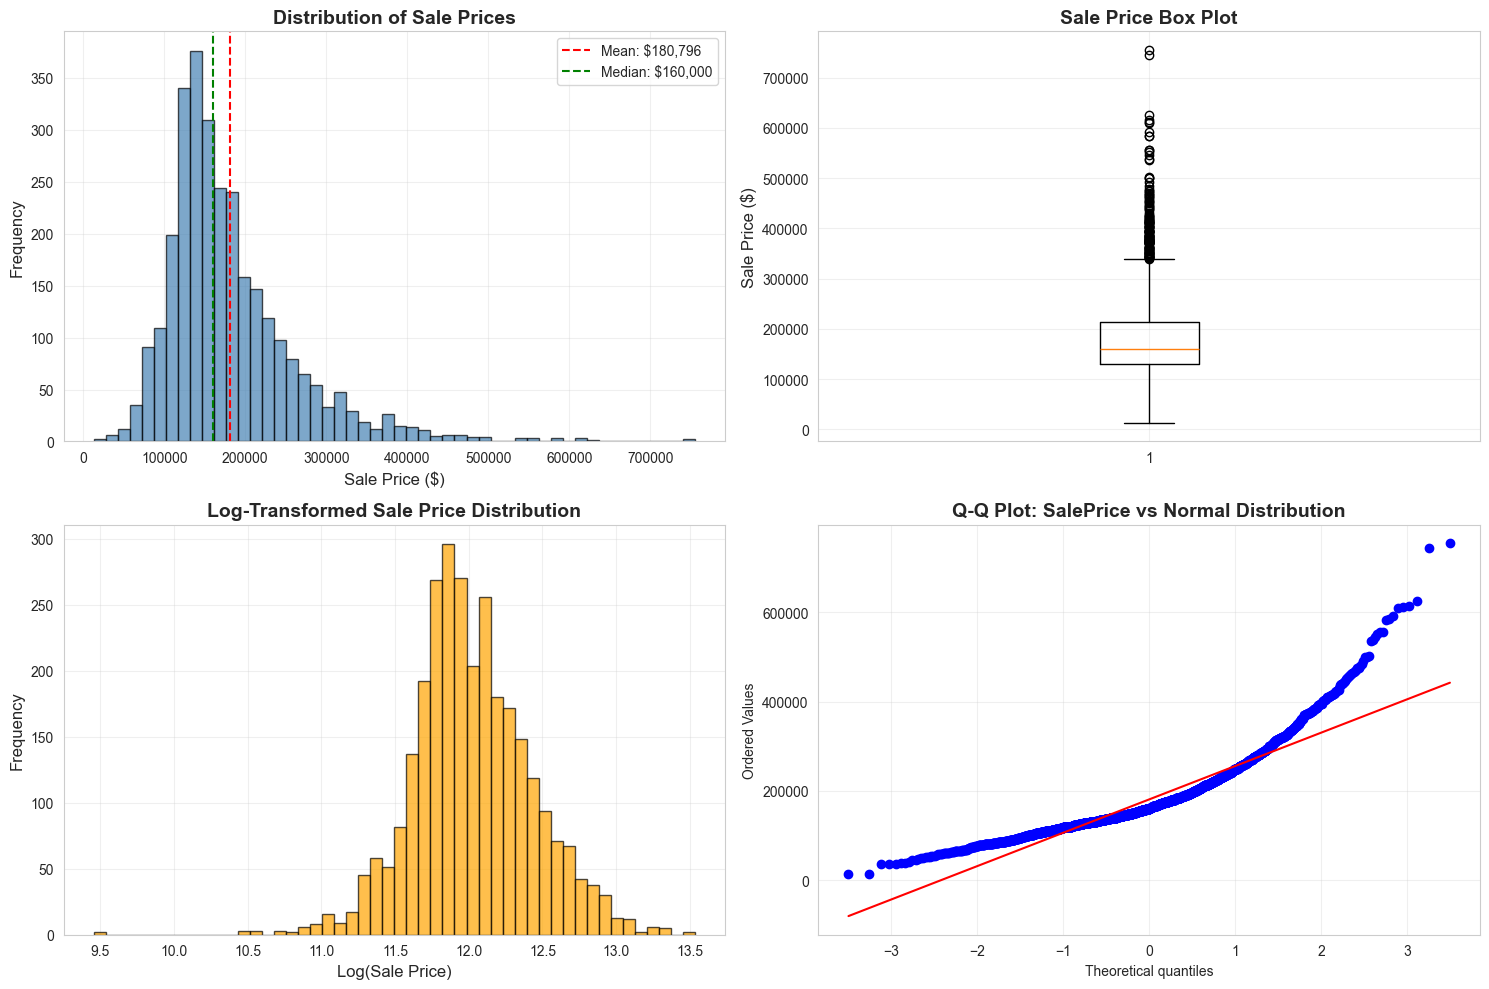


Number of outliers: 137 (4.68%)


In [90]:
# SalePrice statistics
print("SalePrice Statistics:")
print(data['SalePrice'].describe())

# Visualize SalePrice distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(data['SalePrice'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Sale Price ($)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Distribution of Sale Prices', fontsize=14, fontweight='bold')
axes[0, 0].axvline(data['SalePrice'].mean(), color='red', linestyle='--', label=f'Mean: ${data["SalePrice"].mean():,.0f}')
axes[0, 0].axvline(data['SalePrice'].median(), color='green', linestyle='--', label=f'Median: ${data["SalePrice"].median():,.0f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Box plot
axes[0, 1].boxplot(data['SalePrice'], vert=True)
axes[0, 1].set_ylabel('Sale Price ($)', fontsize=12)
axes[0, 1].set_title('Sale Price Box Plot', fontsize=14, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Log-transformed histogram
log_price = np.log1p(data['SalePrice'])
axes[1, 0].hist(log_price, bins=50, color='orange', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Log(Sale Price)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Log-Transformed Sale Price Distribution', fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Q-Q plot
from scipy import stats
stats.probplot(data['SalePrice'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: SalePrice vs Normal Distribution', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Check for outliers
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['SalePrice'] < Q1 - 1.5 * IQR) | (data['SalePrice'] > Q3 + 1.5 * IQR)]
print(f"\nNumber of outliers: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)")

### 1.6 Categorical vs Numerical Features

Number of categorical features: 43
Number of numerical features: 39

Categorical features:
 1. MS Zoning            -   7 unique values
 2. Street               -   2 unique values
 3. Alley                -   2 unique values
 4. Lot Shape            -   4 unique values
 5. Land Contour         -   4 unique values
 6. Utilities            -   3 unique values
 7. Lot Config           -   5 unique values
 8. Land Slope           -   3 unique values
 9. Neighborhood         -  28 unique values
10. Condition 1          -   9 unique values
11. Condition 2          -   8 unique values
12. Bldg Type            -   5 unique values
13. House Style          -   8 unique values
14. Roof Style           -   6 unique values
15. Roof Matl            -   8 unique values
16. Exterior 1st         -  16 unique values
17. Exterior 2nd         -  17 unique values
18. Mas Vnr Type         -   4 unique values
19. Exter Qual           -   4 unique values
20. Exter Cond           -   5 unique values
21. Found

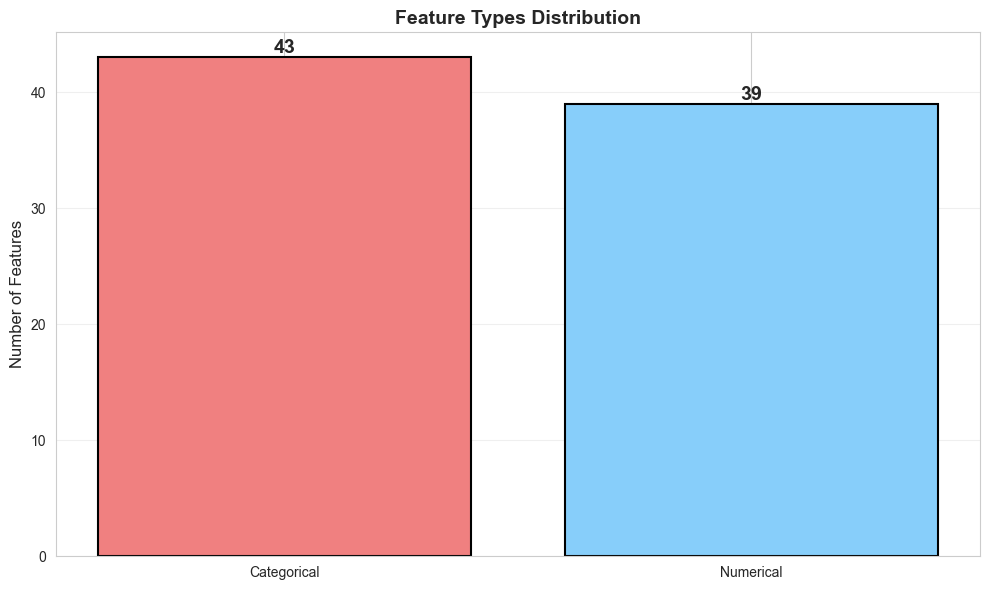

In [91]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()

print(f"Number of categorical features: {len(categorical_cols)}")
print(f"Number of numerical features: {len(numerical_cols)}")

print("\nCategorical features:")
for i, col in enumerate(categorical_cols, 1):
    unique_count = data[col].nunique()
    print(f"{i:2d}. {col:20s} - {unique_count:3d} unique values")

# Visualize distribution
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['Categorical', 'Numerical']
counts = [len(categorical_cols), len(numerical_cols)]
colors = ['lightcoral', 'lightskyblue']

bars = ax.bar(categories, counts, color=colors, edgecolor='black', linewidth=1.5)
ax.set_ylabel('Number of Features', fontsize=12)
ax.set_title('Feature Types Distribution', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 1.7 Correlation Analysis

Top 20 features most correlated with SalePrice:
SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
TotRms AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin SF 1      0.432914
Lot Frontage      0.357318
Wood Deck SF      0.327143
Open Porch SF     0.312951
Half Bath         0.285056
Bsmt Full Bath    0.276050
Name: SalePrice, dtype: float64

Bottom 20 features (negative correlation):
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569


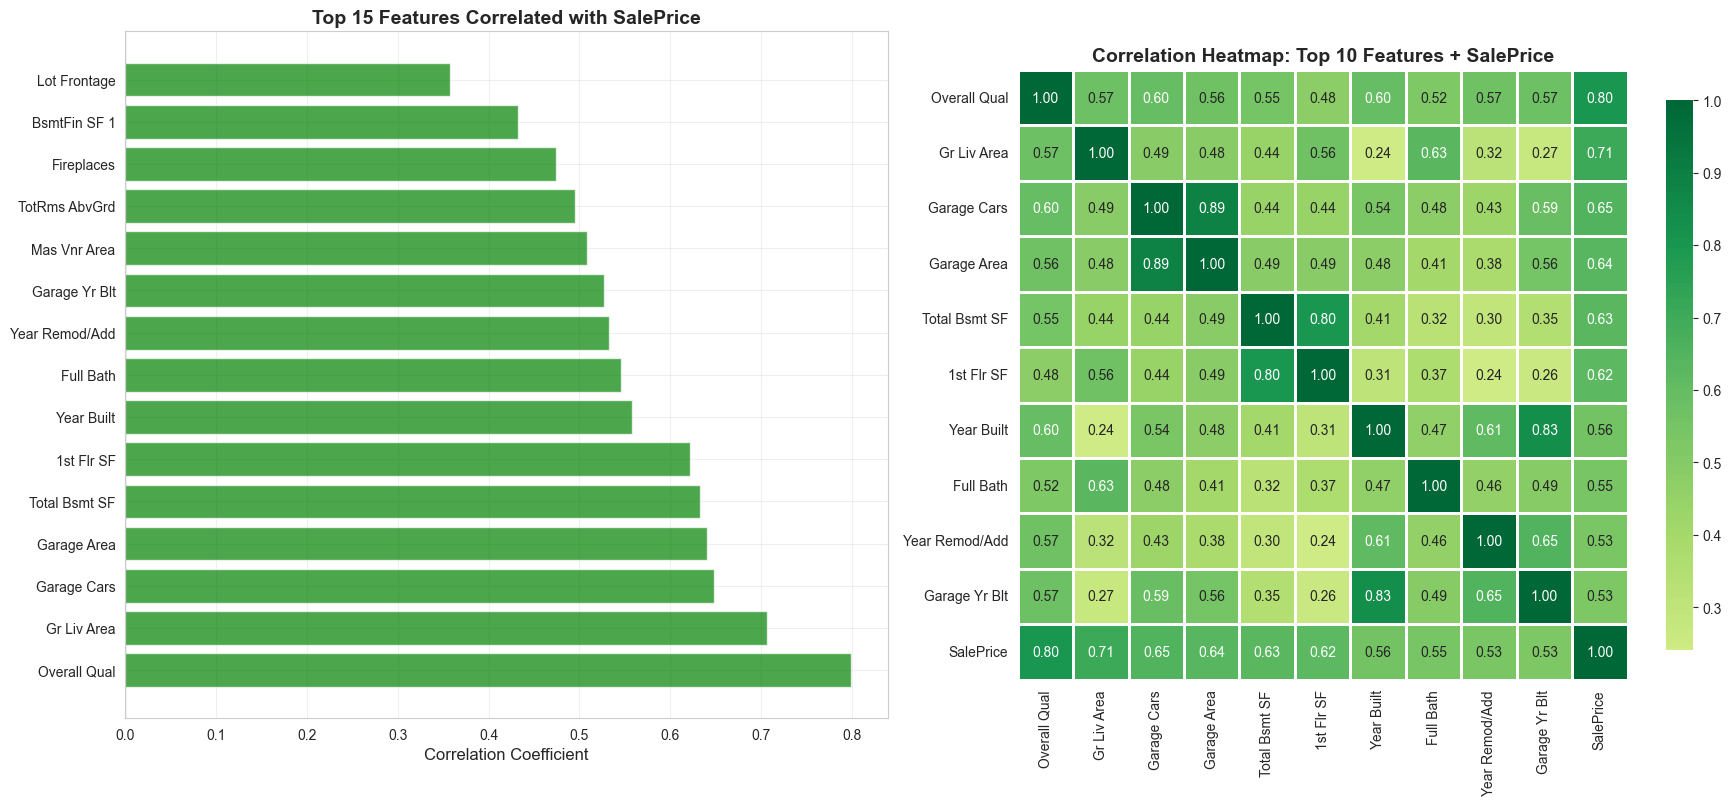

In [92]:
# Select numerical features for correlation analysis
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Get correlations with SalePrice
corr_with_price = correlation_matrix['SalePrice'].sort_values(ascending=False)

print("Top 20 features most correlated with SalePrice:")
print(corr_with_price.head(20))

print("\nBottom 20 features (negative correlation):")
print(corr_with_price.tail(20))

# Visualize top correlations
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Bar plot of correlations
top_corr = corr_with_price.drop('SalePrice').head(15)
colors = ['green' if x > 0 else 'red' for x in top_corr.values]
axes[0].barh(range(len(top_corr)), top_corr.values, color=colors, alpha=0.7)
axes[0].set_yticks(range(len(top_corr)))
axes[0].set_yticklabels(top_corr.index)
axes[0].set_xlabel('Correlation Coefficient', fontsize=12)
axes[0].set_title('Top 15 Features Correlated with SalePrice', fontsize=14, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[0].grid(alpha=0.3)

# Heatmap of top correlations
top_features = corr_with_price.drop('SalePrice').head(10).index.tolist() + ['SalePrice']
top_corr_matrix = numeric_df[top_features].corr()

sns.heatmap(top_corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[1])
axes[1].set_title('Correlation Heatmap: Top 10 Features + SalePrice', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 1.8 Complete Correlation Matrix Heatmap

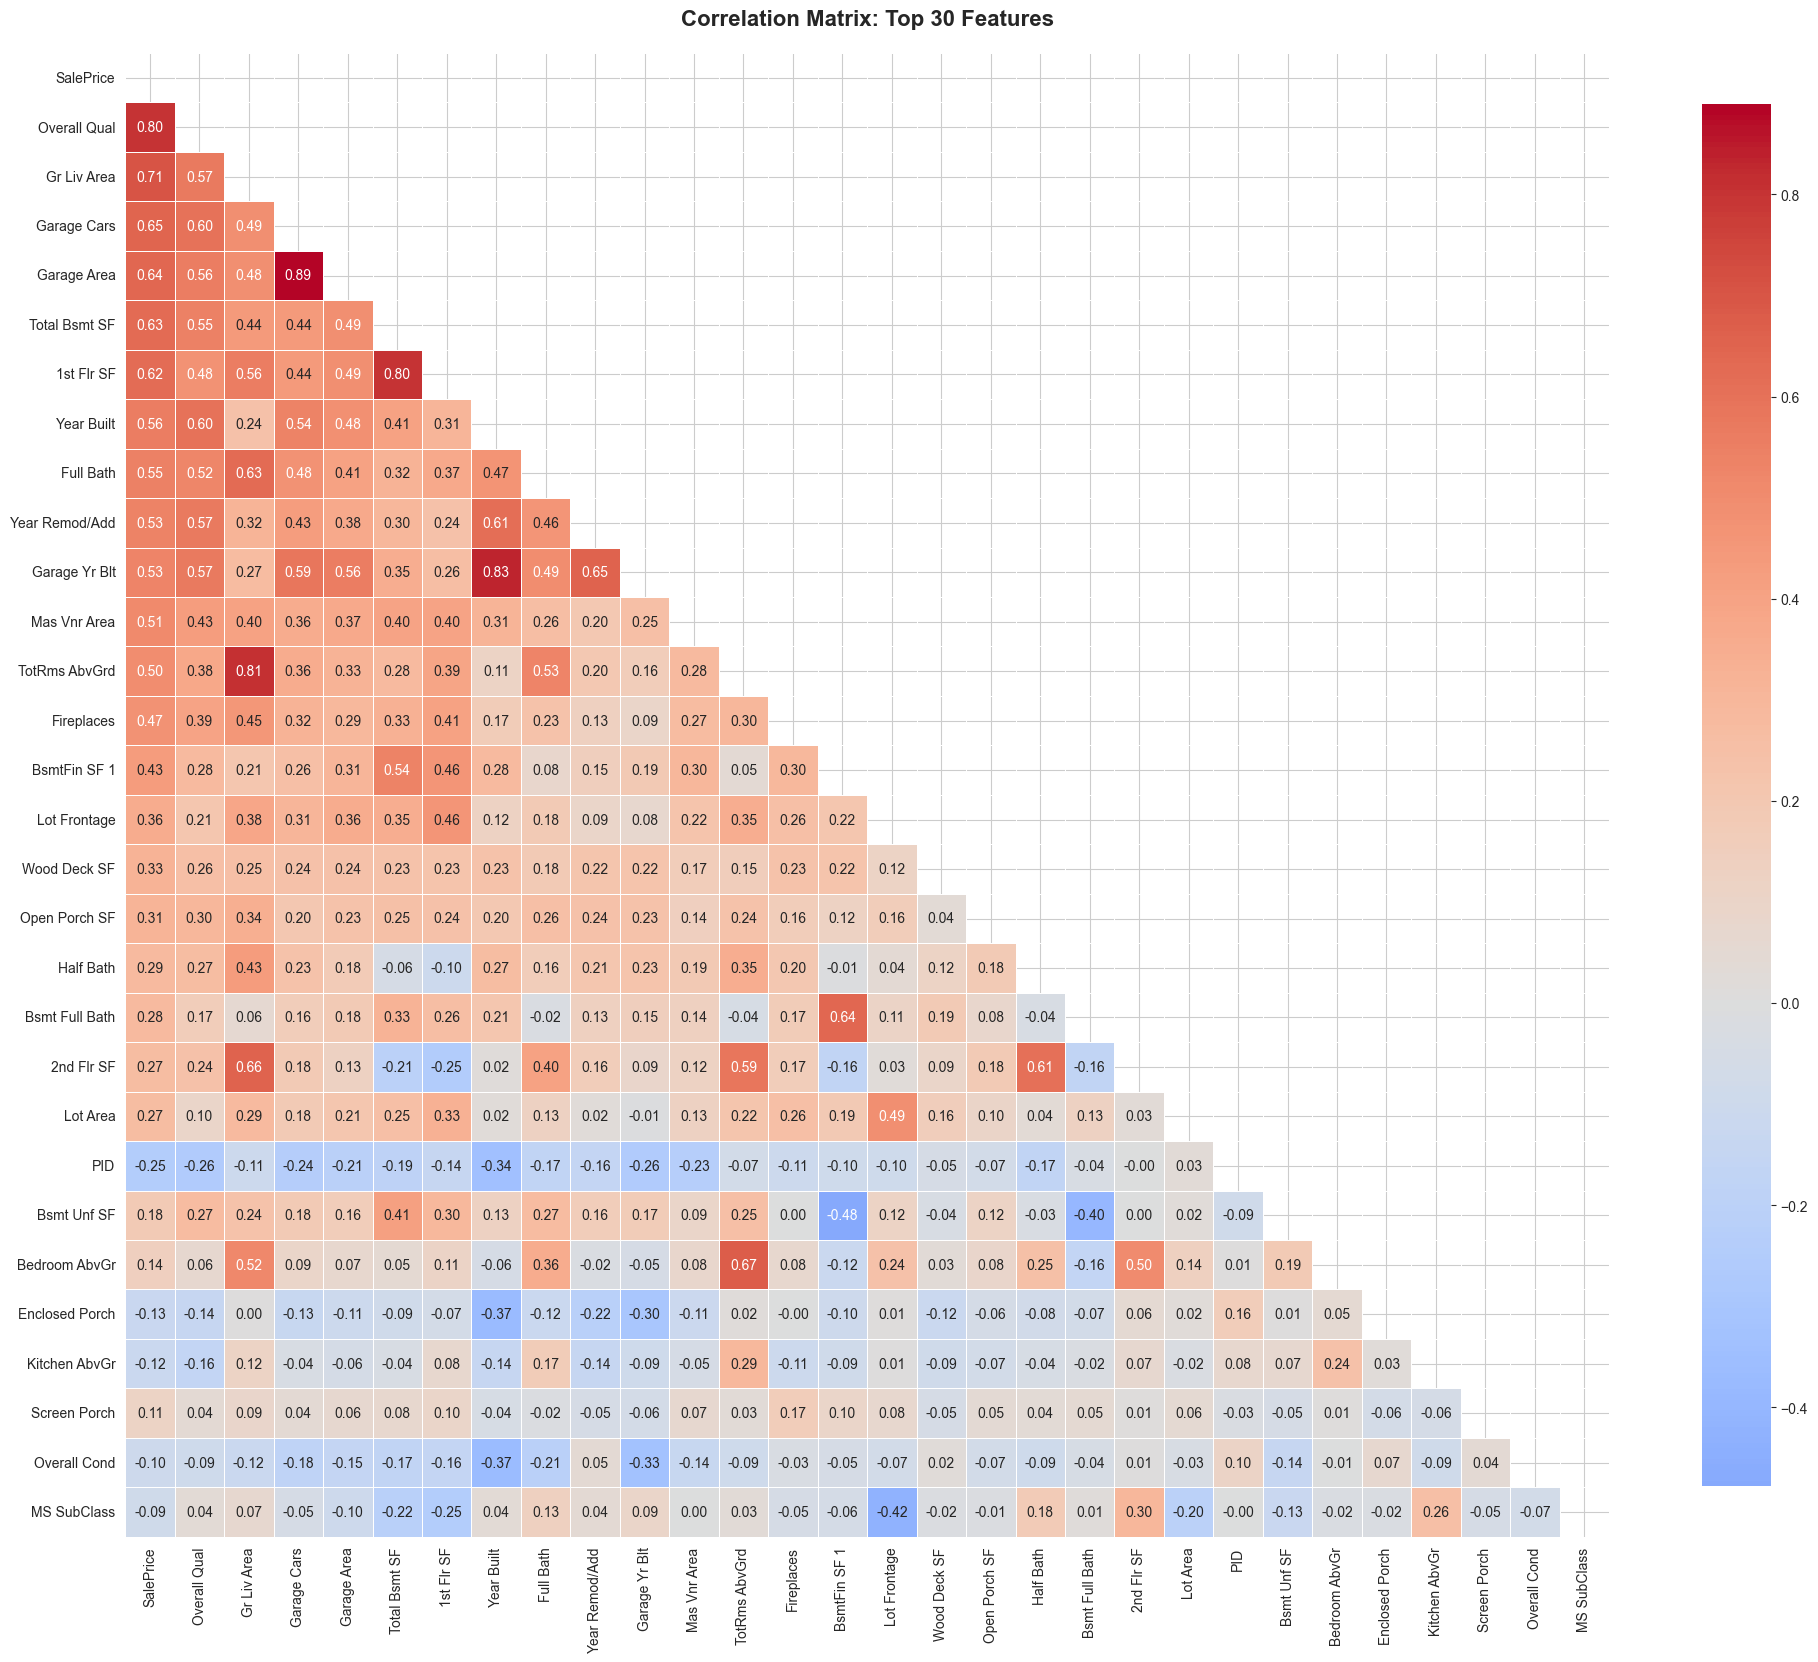

In [93]:
# Full correlation matrix (may be large, so we'll show top 30 features)
plt.figure(figsize=(20, 18))

# Select top 30 most correlated features with SalePrice
top_30_features = corr_with_price.abs().sort_values(ascending=False).head(30).index.tolist()
corr_matrix_top30 = numeric_df[top_30_features].corr()

mask = np.triu(np.ones_like(corr_matrix_top30, dtype=bool))

sns.heatmap(corr_matrix_top30, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Matrix: Top 30 Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### 1.9 Pairplot Analysis

Creating pairplot for 7 features...
This may take a moment...



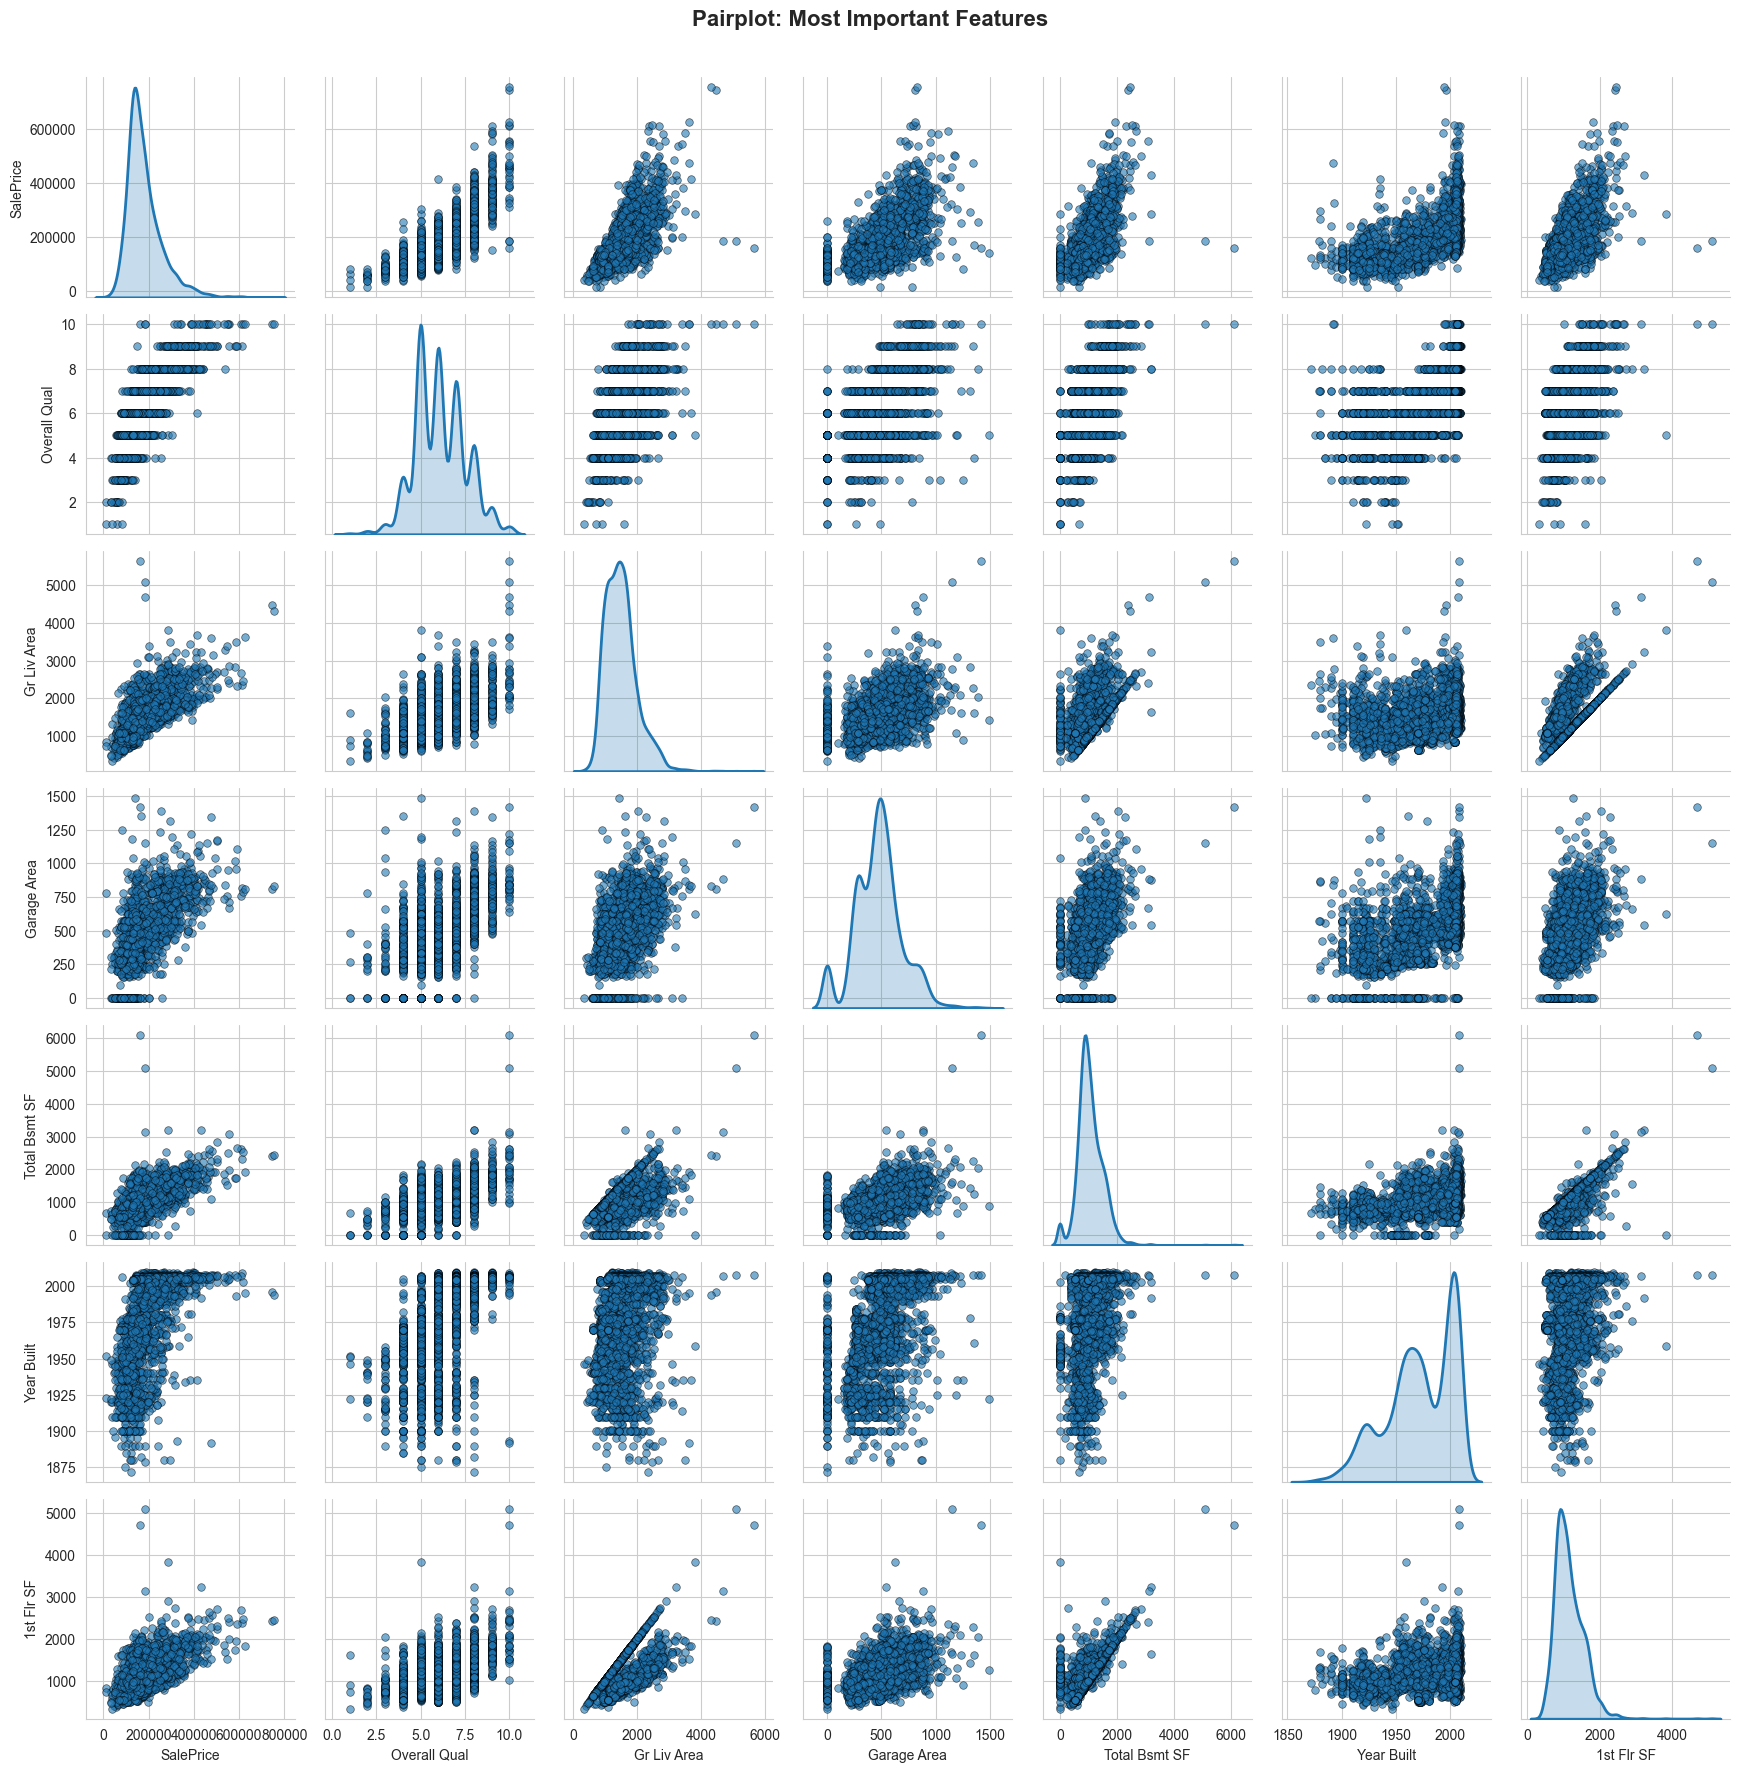

Pairplot created successfully!


In [94]:
# Select top features for pairplot (to keep it manageable)
top_features_pairplot = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area', 
                         'Total Bsmt SF', 'Year Built', '1st Flr SF']

print(f"Creating pairplot for {len(top_features_pairplot)} features...")
print("This may take a moment...\n")

# Create pairplot
pairplot_data = data[top_features_pairplot].dropna()

g = sns.pairplot(pairplot_data, 
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k', 'linewidth': 0.5},
                 diag_kws={'shade': True, 'linewidth': 2})

g.fig.suptitle('Pairplot: Most Important Features', y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Pairplot created successfully!")

### 1.10 Feature Distribution Analysis

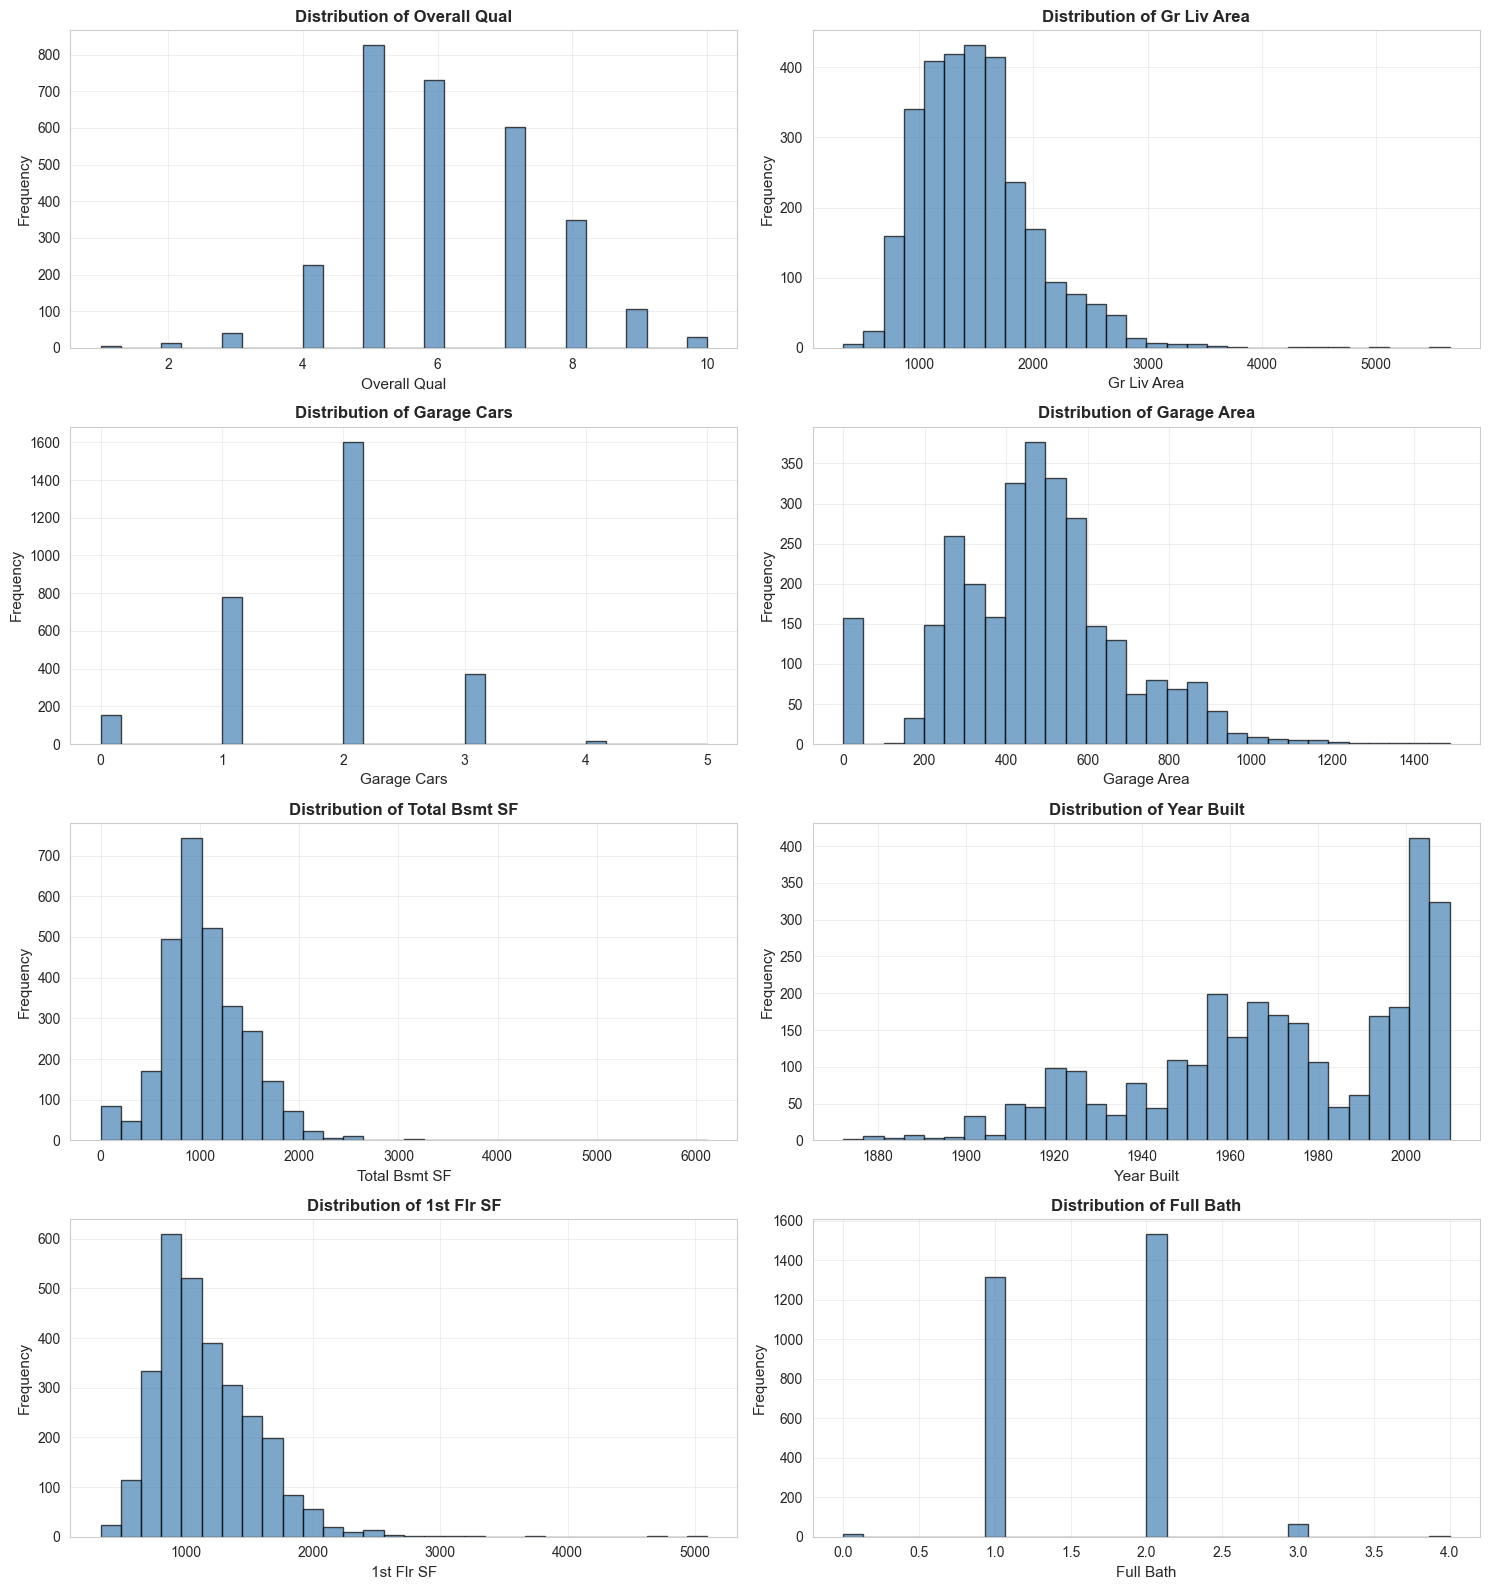

In [95]:
# Analyze distribution of top numerical features
top_num_features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 
                    'Total Bsmt SF', 'Year Built', '1st Flr SF', 'Full Bath']

fig, axes = plt.subplots(4, 2, figsize=(15, 16))
axes = axes.ravel()

for idx, feature in enumerate(top_num_features):
    if feature in data.columns:
        axes[idx].hist(data[feature].dropna(), bins=30, color='steelblue', 
                      edgecolor='black', alpha=0.7)
        axes[idx].set_xlabel(feature, fontsize=11)
        axes[idx].set_ylabel('Frequency', fontsize=11)
        axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
        axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 1.11 Data Preprocessing

In [96]:
# Clean the dataset by removing columns with too many missing values
df = data.copy()

# Drop columns with more than 50% missing values
threshold = 0.5
missing_ratio = df.isnull().sum() / len(df)
cols_to_drop = missing_ratio[missing_ratio > threshold].index.tolist()

print(f"Dropping {len(cols_to_drop)} columns with >50% missing values:")
print(cols_to_drop)

df = df.drop(columns=cols_to_drop)

print(f"\nDataset shape after dropping columns: {df.shape}")

Dropping 5 columns with >50% missing values:
['Alley', 'Mas Vnr Type', 'Pool QC', 'Fence', 'Misc Feature']

Dataset shape after dropping columns: (2930, 77)


### 1.12 Encode Categorical Variables

In [97]:
# Define ordinal encoding mappings
ordinal_mappings = {
    "Lot Shape":         ["IR3", "IR2", "IR1", "Reg"],
    "Land Slope":        ["Sev", "Mod", "Gtl"],
    "Exter Qual":        ["Po", "Fa", "TA", "Gd", "Ex"],
    "Exter Cond":        ["Po", "Fa", "TA", "Gd", "Ex"],
    "Bsmt Qual":         ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    "Bsmt Cond":         ["None", "Po", "Fa", "TA", "Gd", "Ex"],
    "Bsmt Exposure":     ["None", "No", "Mn", "Av", "Gd"],
    "BsmtFin Type 1":    ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFin Type 2":    ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "Heating QC":        ["Po", "Fa", "TA", "Gd", "Ex"],
    "Kitchen Qual":      ["Po", "Fa", "TA", "Gd", "Ex"],
    "Functional":        ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],
    "Paved Drive":       ["N", "P", "Y"],
}

# Apply ordinal encoding
for col, order in ordinal_mappings.items():
    if col in df.columns:
        if "None" in order:
            df[col] = df[col].fillna("None")
        
        oe = OrdinalEncoder(categories=[order], handle_unknown='use_encoded_value', unknown_value=-1)
        df[[col]] = oe.fit_transform(df[[col]])
        df[col] = df[col].astype(int)

# One-Hot Encoding for nominal categorical features
onehot_features = [
    "MS Zoning", "Street", "Land Contour", "Utilities", "Lot Config",
    "Neighborhood", "Condition 1", "Condition 2", "Bldg Type", "House Style",
    "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd", "Foundation",
    "Heating", "Central Air", "Electrical", "Sale Type", "Sale Condition"
]

# Filter features that exist in dataframe
onehot_features = [col for col in onehot_features if col in df.columns]

print(f"Applying One-Hot Encoding to {len(onehot_features)} features...")

ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown='ignore')
encoded = ohe.fit_transform(df[onehot_features])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(onehot_features), index=df.index)

df = pd.concat([df.drop(columns=onehot_features), encoded_df], axis=1)

print(f"\nDataset shape after encoding: {df.shape}")

Applying One-Hot Encoding to 20 features...

Dataset shape after encoding: (2930, 199)


### 1.13 Handle Missing Values and Duplicates

In [98]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

# Fill remaining missing values with median for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_features:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Verify no missing values remain
print(f"\nTotal missing values after cleaning: {df.isnull().sum().sum()}")
print(f"Final dataset shape: {df.shape}")

Number of duplicate rows: 0

Total missing values after cleaning: 2056
Final dataset shape: (2930, 199)


### 1.14 Feature Scaling (Standardization)

In [99]:
# Separate features and target
if 'SalePrice' in df.columns:
    X = df.drop(columns=['SalePrice'])
    y = df['SalePrice']
else:
    raise ValueError("SalePrice column not found!")

# Identify numerical columns (excluding one-hot encoded)
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove ordinal encoded columns from scaling (already scaled 0-n)
ordinal_cols = [col for col in ordinal_mappings.keys() if col in num_cols]
num_cols_to_scale = [col for col in num_cols if col not in ordinal_cols]

print(f"Scaling {len(num_cols_to_scale)} numerical features using RobustScaler...")

# Apply RobustScaler (robust to outliers)
scaler = RobustScaler()
X[num_cols_to_scale] = scaler.fit_transform(X[num_cols_to_scale])

print("Scaling complete!")
print(f"\nFinal feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")

Scaling 180 numerical features using RobustScaler...
Scaling complete!

Final feature matrix shape: (2930, 198)
Target variable shape: (2930,)


### 1.15 Train-Test Split

In [100]:
# Split data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print("Data split completed!")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTraining samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

Data split completed!
Training set: (2344, 198)
Test set: (586, 198)

Training samples: 2344 (80.0%)
Test samples: 586 (20.0%)


### 1.16 Save Preprocessed Data

In [101]:
# Combine X and y back for saving
df_preprocessed = X.copy()
df_preprocessed['SalePrice'] = y

# Save preprocessed data
df_preprocessed.to_csv("AmesHousing_preprocessing_enhanced.csv", index=False)
print("Preprocessed data saved to 'AmesHousing_preprocessing_enhanced.csv'")

# Save train and test sets separately
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df.to_csv("AmesHousing_train_enhanced.csv", index=False)
test_df.to_csv("AmesHousing_test_enhanced.csv", index=False)

print("Training data saved to 'AmesHousing_train_enhanced.csv'")
print("Test data saved to 'AmesHousing_test_enhanced.csv'")

Preprocessed data saved to 'AmesHousing_preprocessing_enhanced.csv'
Training data saved to 'AmesHousing_train_enhanced.csv'
Test data saved to 'AmesHousing_test_enhanced.csv'


In [102]:
# =============================
#  PREPROCESAMIENTO NECESARIO
# =============================

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Detectar columnas categóricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(exclude=['object', 'category']).columns

print("Columnas categóricas:", list(categorical_cols))
print("Columnas numéricas:", list(numeric_cols))

# OneHotEncoder para convertir texto → números
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Aplicar transformaciones ANTES del train/test split
X_transformed = preprocessor.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)


Columnas categóricas: ['Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
Columnas numéricas: ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Lot Shape', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Street_Pave

### 1.17 Baseline Model 1: Linear Regression

BASELINE MODEL 1: LINEAR REGRESSION

Training Set Performance:
  MSE:  494,169,096.06
  RMSE: 22,229.91
  MAE:  14,869.06
  R²:   0.9169

Test Set Performance:
  MSE:  930,195,447.33
  RMSE: 30,499.11
  MAE:  17,779.47
  R²:   0.8840


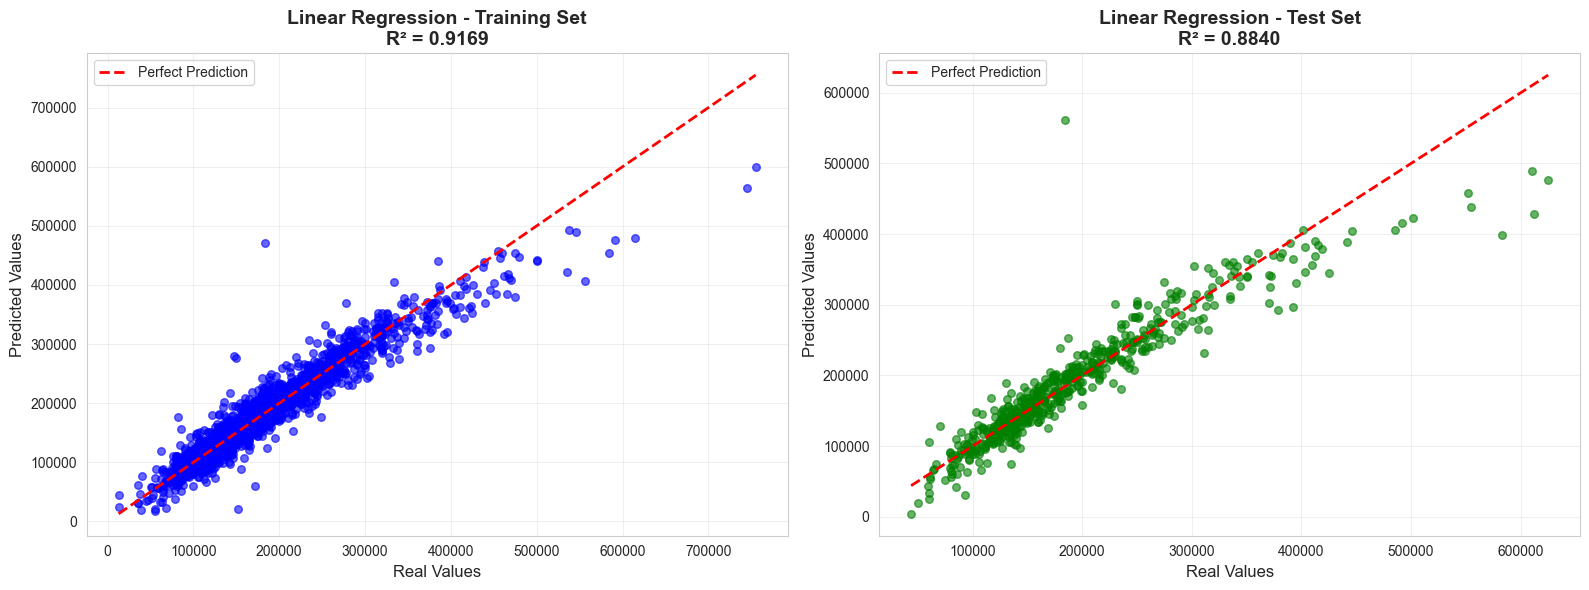

In [103]:
print("="*80)
print("BASELINE MODEL 1: LINEAR REGRESSION")
print("="*80)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

# Calculate metrics
train_mse_lr = mean_squared_error(y_train, y_pred_lr_train)
train_rmse_lr = np.sqrt(train_mse_lr)
train_mae_lr = mean_absolute_error(y_train, y_pred_lr_train)
train_r2_lr = r2_score(y_train, y_pred_lr_train)

test_mse_lr = mean_squared_error(y_test, y_pred_lr_test)
test_rmse_lr = np.sqrt(test_mse_lr)
test_mae_lr = mean_absolute_error(y_test, y_pred_lr_test)
test_r2_lr = r2_score(y_test, y_pred_lr_test)

print("\nTraining Set Performance:")
print(f"  MSE:  {train_mse_lr:,.2f}")
print(f"  RMSE: {train_rmse_lr:,.2f}")
print(f"  MAE:  {train_mae_lr:,.2f}")
print(f"  R²:   {train_r2_lr:.4f}")

print("\nTest Set Performance:")
print(f"  MSE:  {test_mse_lr:,.2f}")
print(f"  RMSE: {test_rmse_lr:,.2f}")
print(f"  MAE:  {test_mae_lr:,.2f}")
print(f"  R²:   {test_r2_lr:.4f}")

# Visualize predictions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(y_train, y_pred_lr_train, alpha=0.6, color='blue', s=30)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Real Values', fontsize=12)
axes[0].set_ylabel('Predicted Values', fontsize=12)
axes[0].set_title(f'Linear Regression - Training Set\nR² = {train_r2_lr:.4f}', 
                  fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Test set
axes[1].scatter(y_test, y_pred_lr_test, alpha=0.6, color='green', s=30)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Real Values', fontsize=12)
axes[1].set_ylabel('Predicted Values', fontsize=12)
axes[1].set_title(f'Linear Regression - Test Set\nR² = {test_r2_lr:.4f}', 
                  fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 1.18 Baseline Model 2: XGBoost

BASELINE MODEL 2: XGBOOST

Training XGBoost model...

Training Set Performance:
  MSE:  96,117,552.00
  RMSE: 9,803.96
  MAE:  7,332.89
  R²:   0.9838

Test Set Performance:
  MSE:  598,373,312.00
  RMSE: 24,461.67
  MAE:  14,915.48
  R²:   0.9254


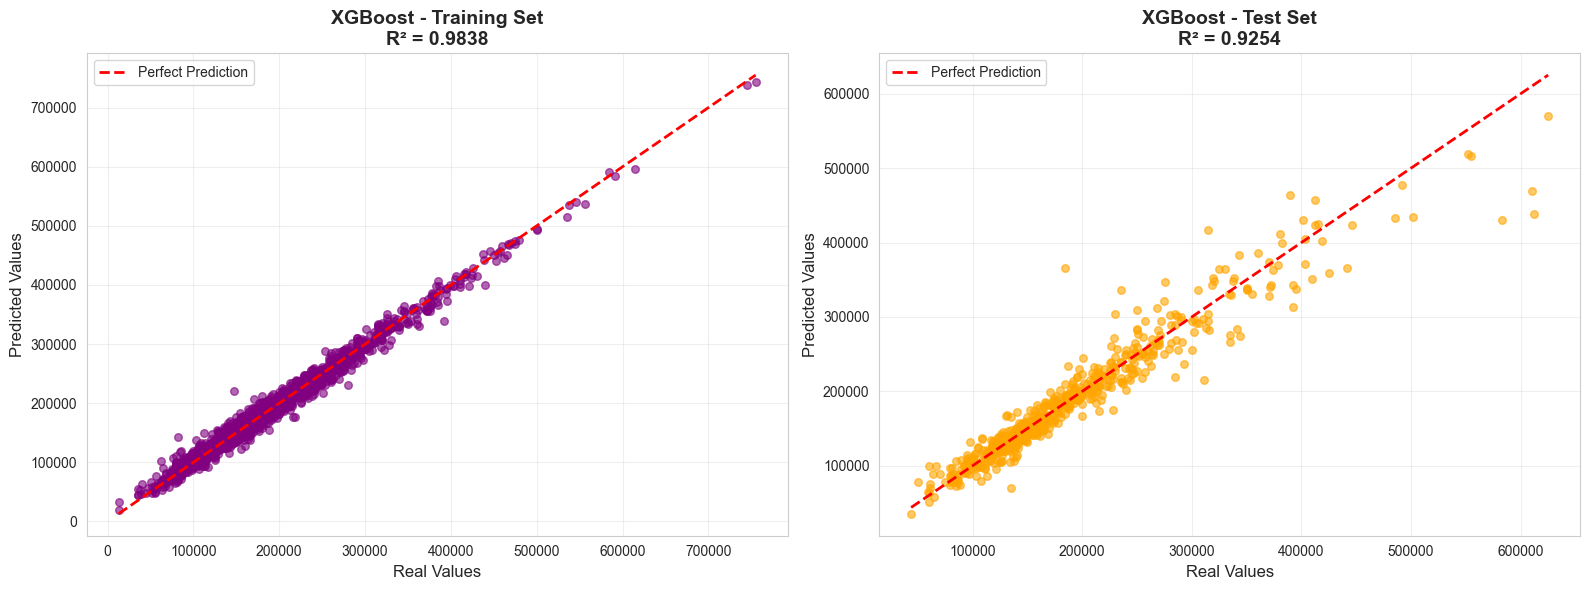

In [104]:
print("="*80)
print("BASELINE MODEL 2: XGBOOST")
print("="*80)

# Train XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

print("\nTraining XGBoost model...")
xgb_model.fit(X_train, y_train, 
              eval_set=[(X_train, y_train), (X_test, y_test)],
              verbose=False)

# Predictions
y_pred_xgb_train = xgb_model.predict(X_train)
y_pred_xgb_test = xgb_model.predict(X_test)

# Calculate metrics
train_mse_xgb = mean_squared_error(y_train, y_pred_xgb_train)
train_rmse_xgb = np.sqrt(train_mse_xgb)
train_mae_xgb = mean_absolute_error(y_train, y_pred_xgb_train)
train_r2_xgb = r2_score(y_train, y_pred_xgb_train)

test_mse_xgb = mean_squared_error(y_test, y_pred_xgb_test)
test_rmse_xgb = np.sqrt(test_mse_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_pred_xgb_test)
test_r2_xgb = r2_score(y_test, y_pred_xgb_test)

print("\nTraining Set Performance:")
print(f"  MSE:  {train_mse_xgb:,.2f}")
print(f"  RMSE: {train_rmse_xgb:,.2f}")
print(f"  MAE:  {train_mae_xgb:,.2f}")
print(f"  R²:   {train_r2_xgb:.4f}")

print("\nTest Set Performance:")
print(f"  MSE:  {test_mse_xgb:,.2f}")
print(f"  RMSE: {test_rmse_xgb:,.2f}")
print(f"  MAE:  {test_mae_xgb:,.2f}")
print(f"  R²:   {test_r2_xgb:.4f}")

# Visualize predictions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(y_train, y_pred_xgb_train, alpha=0.6, color='purple', s=30)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Real Values', fontsize=12)
axes[0].set_ylabel('Predicted Values', fontsize=12)
axes[0].set_title(f'XGBoost - Training Set\nR² = {train_r2_xgb:.4f}', 
                  fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Test set
axes[1].scatter(y_test, y_pred_xgb_test, alpha=0.6, color='orange', s=30)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Real Values', fontsize=12)
axes[1].set_ylabel('Predicted Values', fontsize=12)
axes[1].set_title(f'XGBoost - Test Set\nR² = {test_r2_xgb:.4f}', 
                  fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 1.19 Feature Importance from XGBoost

Columnas categóricas: ['Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
Columnas numéricas: ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Lot Shape', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Street_Pave

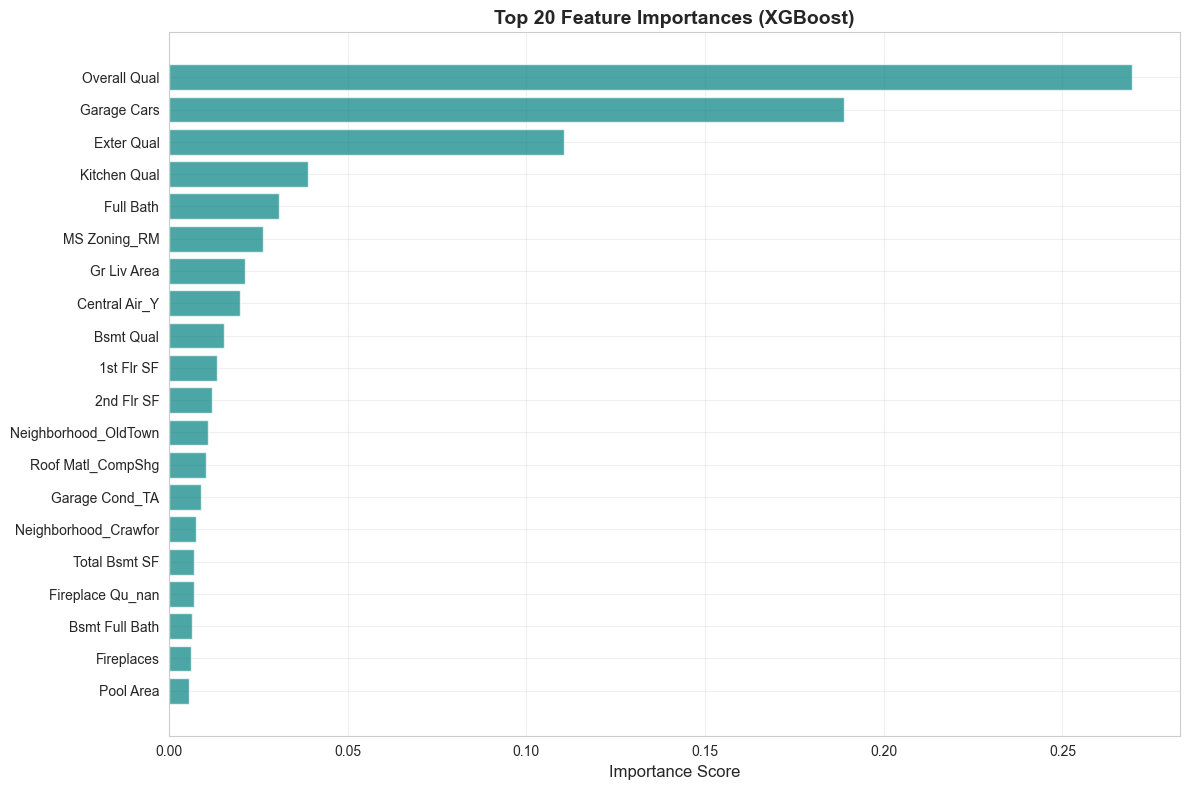

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb

# ===============================================================
# 1. PREPROCESAMIENTO - DETECTAR CATEGÓRICAS Y APLICAR OHE
# ===============================================================

# Detectar columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(exclude=['object', 'category']).columns

print("Columnas categóricas:", list(categorical_cols))
print("Columnas numéricas:", list(numeric_cols))

# Crear preprocess pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Ajustar y transformar X completo
X_transformed = preprocessor.fit_transform(X)

# Recuperar nombres de columnas transformadas
ohe = preprocessor.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)
feature_names = np.concatenate([ohe_feature_names, numeric_cols])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

# ===============================================================
# 2. ENTRENAR XGBOOST
# ===============================================================

xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# ===============================================================
# 3. FEATURE IMPORTANCES
# ===============================================================

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 20 Most Important Features (XGBoost):")
print(feature_importance.head(20).to_string(index=False))

# ===============================================================
# 4. PLOTEAR FEATURE IMPORTANCES
# ===============================================================

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(20)

plt.barh(
    range(len(top_features)),
    top_features['Importance'].values,
    color='teal',
    alpha=0.7
)

plt.yticks(range(len(top_features)), top_features['Feature'].values)
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 20 Feature Importances (XGBoost)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


### 1.20 Model Comparison Summary


BASELINE MODELS COMPARISON
            Model    Train_MSE   Train_RMSE  Train_R2     Test_MSE    Test_RMSE  Test_R2
Linear Regression 4.941691e+08 22229.914441  0.916887 9.301954e+08 30499.105681 0.883980
          XGBoost 9.611755e+07  9803.955936  0.983834 5.983733e+08 24461.670262 0.925367


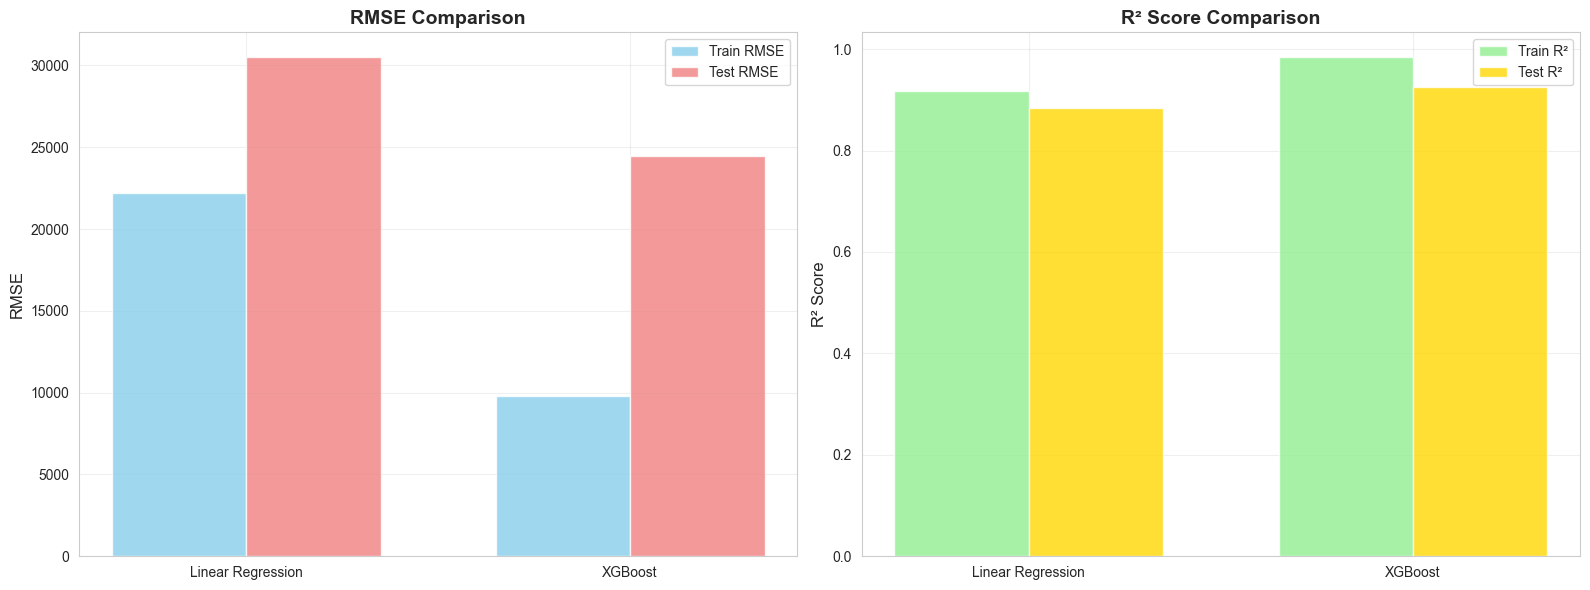

In [106]:
# Create comparison table
comparison_df = pd.DataFrame([
    {
        'Model': 'Linear Regression',
        'Train_MSE': train_mse_lr,
        'Train_RMSE': train_rmse_lr,
        'Train_R2': train_r2_lr,
        'Test_MSE': test_mse_lr,
        'Test_RMSE': test_rmse_lr,
        'Test_R2': test_r2_lr
    },
    {
        'Model': 'XGBoost',
        'Train_MSE': train_mse_xgb,
        'Train_RMSE': train_rmse_xgb,
        'Train_R2': train_r2_xgb,
        'Test_MSE': test_mse_xgb,
        'Test_RMSE': test_rmse_xgb,
        'Test_R2': test_r2_xgb
    }
])

print("\n" + "="*100)
print("BASELINE MODELS COMPARISON")
print("="*100)
print(comparison_df.to_string(index=False))
print("="*100)

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# RMSE comparison
models = comparison_df['Model'].values
train_rmse = comparison_df['Train_RMSE'].values
test_rmse = comparison_df['Test_RMSE'].values

x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, train_rmse, width, label='Train RMSE', color='skyblue', alpha=0.8)
axes[0].bar(x + width/2, test_rmse, width, label='Test RMSE', color='lightcoral', alpha=0.8)
axes[0].set_ylabel('RMSE', fontsize=12)
axes[0].set_title('RMSE Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].grid(alpha=0.3)

# R² comparison
train_r2 = comparison_df['Train_R2'].values
test_r2 = comparison_df['Test_R2'].values

axes[1].bar(x - width/2, train_r2, width, label='Train R²', color='lightgreen', alpha=0.8)
axes[1].bar(x + width/2, test_r2, width, label='Test R²', color='gold', alpha=0.8)
axes[1].set_ylabel('R² Score', fontsize=12)
axes[1].set_title('R² Score Comparison', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Summary

### Dataset Overview
- **Source**: Ames Housing Dataset
- **Total Samples**: 2930
- **Original Features**: 82
- **After Preprocessing**: Varies based on encoding
- **Target Variable**: SalePrice (continuous)

### Data Preprocessing Steps
1. ✅ Missing value analysis and handling
2. ✅ Removal of columns with >50% missing values
3. ✅ Ordinal encoding for ordered categorical variables
4. ✅ One-hot encoding for nominal categorical variables
5. ✅ Feature scaling using RobustScaler
6. ✅ Train-test split (80-20)

### Visualizations Created
1. ✅ Missing values analysis
2. ✅ Target variable distribution
3. ✅ Feature types distribution
4. ✅ Correlation analysis
5. ✅ Correlation matrix heatmap
6. ✅ Pairplot of top features
7. ✅ Feature distributions
8. ✅ Model prediction scatter plots
9. ✅ Feature importance (XGBoost)
10. ✅ Model performance comparison

### Baseline Models Performance
- **Linear Regression**: Provides interpretable baseline
- **XGBoost**: Captures non-linear relationships, better performance

### Next Steps
- Implement Neural Network (Part 2)
- Compare all models (Part 3)
- Hyperparameter tuning
- Cross-validation